In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 31

### Discussion Question ###

* Midterm: Average 70, SD 10
* Final:   Average 50, SD 12
* r = 0.75

a) Estimate the average final exam score for those who got 90 on the midterm.

b) Estimate the average final exam score for those who got 60 on the midterm.

In [2]:
# Calculate slope and intercept in original units, then input 90 and 60 as midterm scores
slope = 0.75*12/10
intercept =50 - slope*70
print(slope, intercept)
print(slope*90 + intercept)
print(slope*60 + intercept)












0.9 -13.0
68.0
41.0


In [3]:
#Standardize the inputs instead
print((.75*(90-70)/10)*12+50)
print((.75*(60-70)/10)*12+50)




68.0
41.0


### Regression Line ###

In [4]:
#Draw a line for a given slope, intercept, and possibly input location x
def draw_line(slope=0, intercept=0, x=None, color='r'):
    if x is None:
        x1, x2, y1, y2 = plots.gca().axis()
    x = make_array(x1, x2)
    y = x*slope + intercept
    plots.plot(x, y, color=color)

In [5]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [6]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [7]:
#Produces a plot we will use for a dataset in this demo to visualize errors
def demographics_errors(slope, intercept):
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

In [8]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [9]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


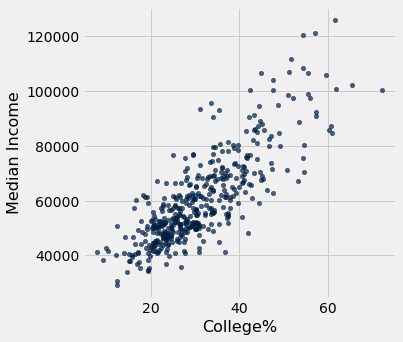

In [10]:
demographics.scatter('College%', 'Median Income')

In [11]:
#Correlation
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [12]:
#Slope and intercept
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
(regression_slope, regression_intercept)

(1270.70168946388, 20802.577766677925)

In [13]:
#Predicted median incomes
predicted = fitted_values(demographics, 'College%', 'Median Income')

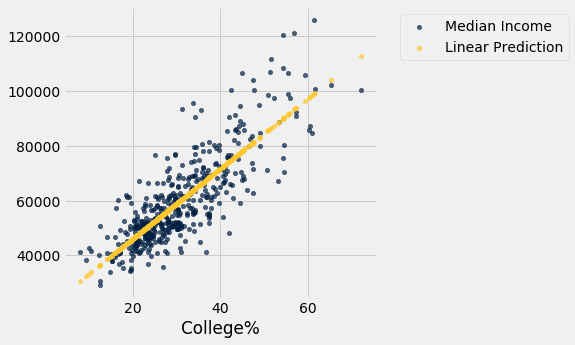

In [14]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [15]:
#What are the errors between the actual observations and the predicted values?
actual = demographics.column('Median Income')
errors = actual - predicted
demographics.with_column('Error', errors)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


In [16]:
#Root mean squared error
np.mean(errors ** 2) ** 0.5

9398.515588571281

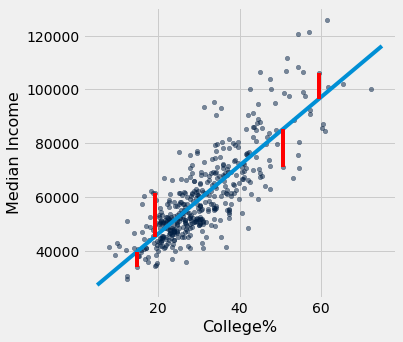

In [17]:
#Visualize errors for estimated line
demographics_errors(regression_slope, regression_intercept)

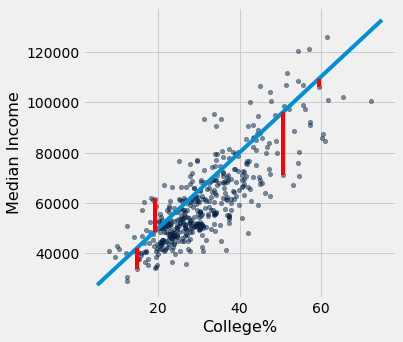

In [18]:
# Try any slope, any intercept
demographics_errors(1500, 20000)

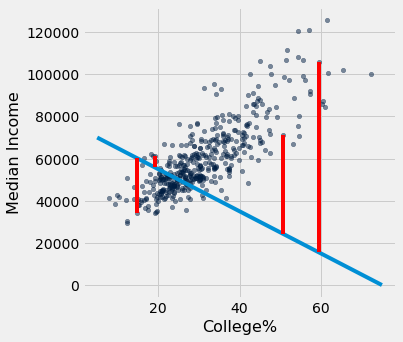

In [19]:
demographics_errors(-1000, 75000)

### Root Mean Square Error ###

In [20]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Root mean squared error: 11559.086490075999


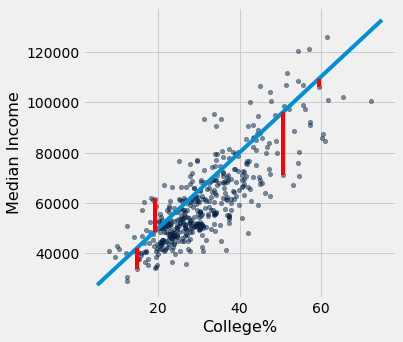

In [21]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 30247.883767944502


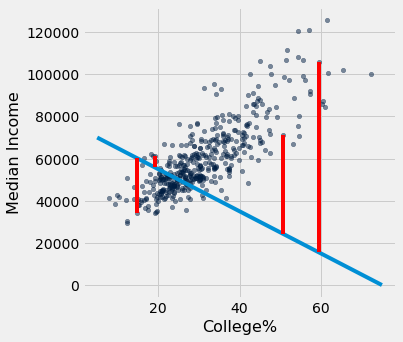

In [22]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 27566.21531316829


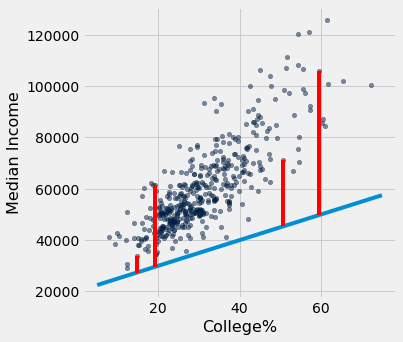

In [23]:
show_demographics_rmse(500, 20000)

Root mean squared error: 9398.515588571281


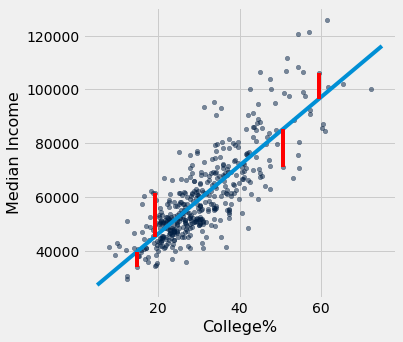

In [24]:
show_demographics_rmse(regression_slope, regression_intercept)

### Numerical Optimization ###

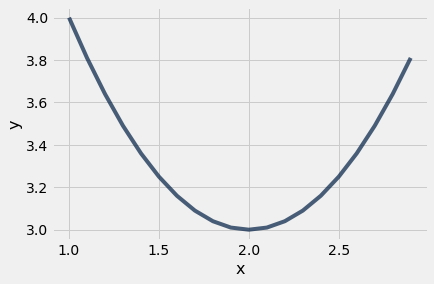

In [25]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [26]:
def f(x):
    return ((x-2)**2) + 3

In [27]:
minimize(f)

1.9999999946252267

### Minimizing RMSE ###

In [28]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [29]:
demographics_rmse(1500, 20000)

11559.086490075999

In [30]:
demographics_rmse(-1000, 75000)

30247.883767944502

In [31]:
#Minimize the function
minimize(demographics_rmse)

array([ 1270.70168805, 20802.57933807])

In [32]:
#Our estimates from earlier
make_array(regression_slope, regression_intercept)

array([ 1270.70168946, 20802.57776668])

In [33]:
#rmse
demographics_rmse(regression_slope, regression_intercept)

9398.515588571281

### Nonlinear Regression ###

In [34]:
shotput = Table.read_table('shotput.csv')

In [35]:
#2013 exercise science study
#28 female college athletes
#Weight lifted:  largest amount (in kg) amount athlete lifted pre-season
#Shot Put Distance:  athlete's personal best (in meters)
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


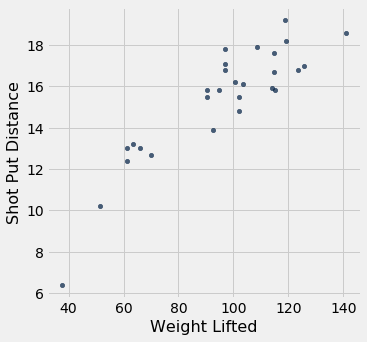

In [36]:
shotput.scatter('Weight Lifted')

In [37]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [38]:
best_line = minimize(shotput_linear_rmse)
best_line

array([0.09834382, 5.95962883])

In [39]:
weights = shotput.column(0)

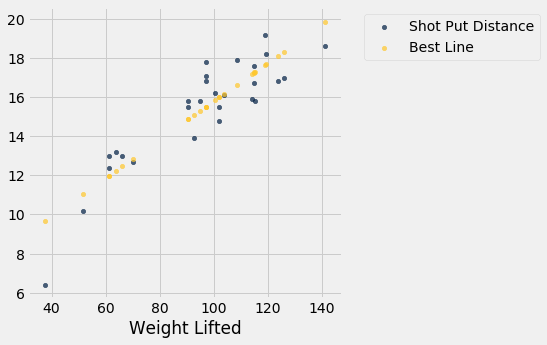

In [40]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [41]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [42]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([-1.04003731e-03,  2.82706003e-01, -1.53167618e+00])

In [43]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [44]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

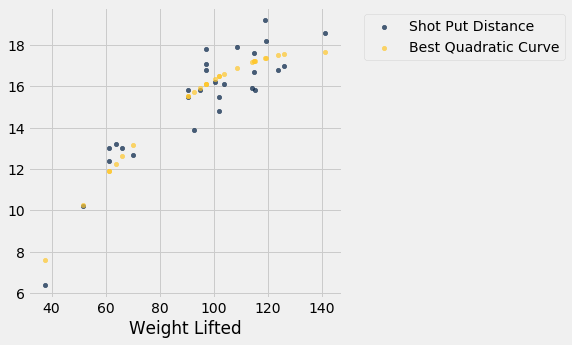

In [45]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

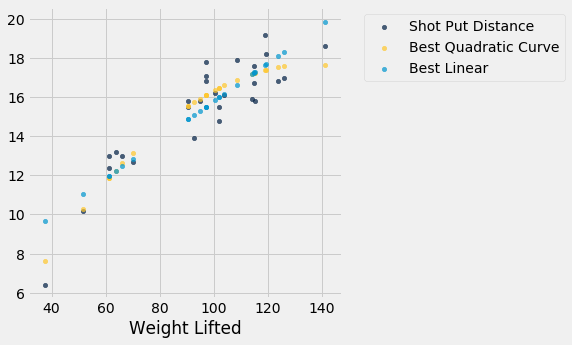

In [46]:
shotput = shotput.with_columns('Best Quadratic Curve', quad_fit, "Best Linear", linear_fit)
shotput.scatter("Weight Lifted")